In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# HR_management data
"In this project, I'll visualize data to help readers gain clearer insights."  

In [2]:
df_hr = pd.read_csv('dateset/HR_Data.csv', header=0)  
df_hr.head()
# df_hr.dtypes 

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


# Frame info :
### 1470 rows x 41 columns

In [3]:
num_rows, num_columns = df_hr.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns) 

Number of rows: 1470
Number of columns: 41


# Count Active emplooyee

 Number of no 1233


,Attrition,number
0,Yes,1233
1,No,237


Employee rate : 		83.88 


Text(0.5, 1.0, 'Employee Status Overview: Active vs. Inactive')

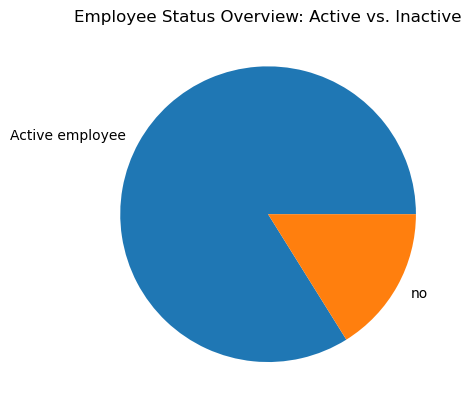

In [11]:
unique_attrition = df_hr['Attrition'].drop_duplicates()

def count_row(row) :
    count = 0 
    # for value in row  :
    if row == 'No' :
        count = 1      
        # else :
        #     count = 0             
    return count
    # return row[row=='No'].count()
    
df_hr['active'] = df_hr['Attrition'].apply(lambda row : count_row(row))

print(f" Number of no {df_hr['active'].sum()}")
active = df_hr['active'].sum()
# print(unique_attrition) 

attrition = pd.DataFrame(unique_attrition)  
attrition['number'] =  [ active ,   num_rows - active ]
display(attrition )
percenk = (active / num_rows) * 100 
# print(f"Employee rate : {percenk.row}")
print(f"Employee rate : \t\t{round(percenk , 2)} ")
# print( active / num_rows))
# print(active.sum())  
# print(active.sum())

plt.pie(attrition['number'], labels=['Active employee' , 'no'])
plt.title('Employee Status Overview: Active vs. Inactive')

In [5]:
# unq_overtime = df_hr['Over Time'].drop_duplicates()
# unq_department = df_hr['Department'].drop_duplicates()

def count_yess(row) :
    count = 0 
    # for value in row  :
    if row == 'Yes' :
        count = 1      
    return count

df_hr['overtime_yes'] = df_hr['Over Time'].apply( lambda row : count_yess(row))
# df_hr.head()
condition = df_hr['Attrition'] == 'No'
tb_overtime = df_hr[condition].groupby('Department')['overtime_yes'].sum().reset_index()
tb_overtime   

# tb_overtime.loc['Attrition']
# tb_overtime = pd.DataFrame(unq_department , ) # , unq_overtime  ) 

,Department,overtime_yes
0,HR,12
1,R&D,197
2,Sales,80


In [6]:
condition = df_hr['Attrition'] == 'No'
condition

0       False
1        True
2       False
3        True
4        True
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: Attrition, Length: 1470, dtype: bool

Text(0.5, 1.0, 'Overtime by Department')

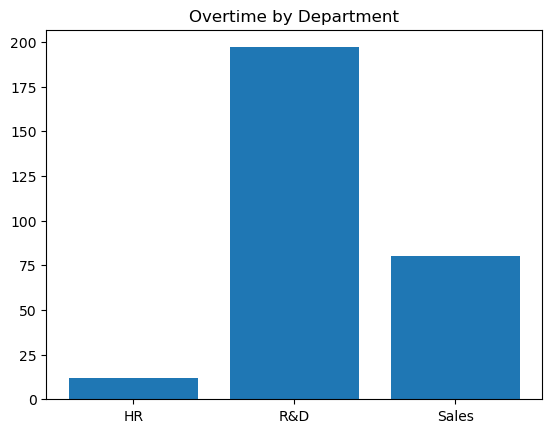

In [7]:
plt.bar(tb_overtime['Department'] , tb_overtime['overtime_yes'] )   
plt.title('Overtime by Department')

In [44]:

unq_gender = df_hr['Gender'].drop_duplicates()
print(f"{unq_gender}")

def female(row):
    count = 0 
    if row == 'Female' :
        count = 1
    return count

def male(row) :
    count = 0 
    if row == 'Male' :
        count = 1 
    return count
    
# df_hr['female']
df_hr['female'] = df_hr['Gender'].apply(lambda row : female(row))
df_hr['male'] = df_hr['Gender'].apply(lambda row : male(row))
# df_hr['']

tb_ages = df_hr[condition].groupby('CF_age band')[['female' , 'male']].sum().reset_index()
tb_ages
# plt.plot(df_hr[''])

0    Female
1      Male
Name: Gender, dtype: object


,CF_age band,female,male
0,25 - 34,174,268
1,35 - 44,182,272
2,45 - 54,104,116
3,Over 55,22,36
4,Under 25,19,40


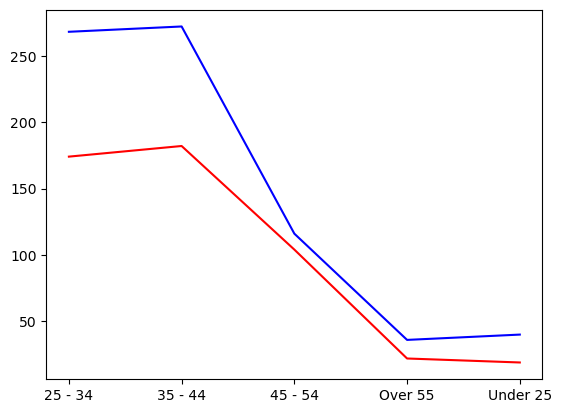

In [47]:
plt.plot(tb_ages['CF_age band'] , tb_ages['female'] , color='Red')
plt.plot(tb_ages['CF_age band'] , tb_ages['male'] , color='Blue')